In [32]:
# %load /home/jonathan/.ipython/profile_default/startup/startup-01.py
# start up settings for ipython
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys

plt.style.use('ggplot')
plt.rcParams['font.size'] = 15.0
plt.rcParams['axes.labelsize'] = 15.0
plt.rcParams['xtick.labelsize'] = 15.0
plt.rcParams['ytick.labelsize'] = 15.0
plt.rcParams['legend.fontsize'] = 15.0

%matplotlib inline

# set the max column width
pd.options.display.max_colwidth = 1000


In [87]:
tender_full_df = pd.read_csv('../../data/processed14Nov/tender.csv')
tprod_full_df = pd.read_csv('../../data/processed14Nov/tenderProduct.csv')

In [92]:
sant_tfull_df = tender_full_df[(tender_full_df['CompradorRegionUnidad'].str.lower().str.startswith('region metro'))]
sant_tids = sant_tfull_df['CodigoExterno'].unique()
sant_tprod_df = tprod_full_df[(tprod_full_df['CodigoExterno'].isin(sant_tids))]

print('Number of tenders in santiago: {}'.format(sant_tids.shape[0]))
print('Number of tender products: {}'.format(sant_tprod_df.shape[0]))
print('Number of public organization: {}'.format(sant_tfull_df['CompradorCodigoOrganismo'].unique().shape[0]))
print('Number of involved providers: {}'.format(sant_tprod_df['AdjudicacionRutProveedor'].unique().shape[0]))

Number of tenders in santiago: 3640
Number of tender products: 13582
Number of public organization: 222
Number of involved providers: 1761


In [134]:
merged_df.columns

Index(['AdjudicacionCantidad', 'AdjudicacionMontoUnitario',
       'AdjudicacionNombreProveedor', 'AdjudicacionRutProveedor', 'Cantidad',
       'Categoria', 'CodigoCategoria', 'CodigoExterno', 'CodigoProducto',
       'Correlativo', 'Descripcion_x', 'NombreProducto', 'UnidadMedida',
       'AdjudicacionFecha', 'AdjudicacionNumero',
       'AdjudicacionNumeroOferentes', 'AdjudicacionTipo',
       'AdjudicacionUrlActa', 'CantidadReclamos', 'CodigoEstado', 'CodigoTipo',
       'CompradorCargoUsuario', 'CompradorCodigoOrganismo',
       'CompradorCodigoUnidad', 'CompradorCodigoUsuario',
       'CompradorComunaUnidad', 'CompradorDireccionUnidad',
       'CompradorNombreOrganismo', 'CompradorNombreUnidad',
       'CompradorNombreUsuario', 'CompradorRegionUnidad', 'CompradorRutUnidad',
       'CompradorRutUsuario', 'Contrato', 'Descripcion_y',
       'DiasCierreLicitacion', 'DireccionEntrega', 'DireccionVisita',
       'EmailResponsableContrato', 'EmailResponsablePago', 'EsBaseTipo',
       

In [138]:
merged_df = tprod_full_df.merge(tender_full_df, on='CodigoExterno')
merged_df[
    (merged_df['AdjudicacionCantidad'] == 1)&
    (merged_df['NombreProducto'].str.contains('jugue'))
][['CodigoProducto', 'Descripcion_x', 'AdjudicacionMontoUnitario', 'AdjudicacionCantidad', 'AdjudicacionNombreProveedor', 'AdjudicacionUrlActa']].sort_values('AdjudicacionMontoUnitario', ascending=False)

,CodigoProducto,Descripcion_x,AdjudicacionMontoUnitario,AdjudicacionCantidad,AdjudicacionNombreProveedor,AdjudicacionUrlActa
37095,60124506,ADQUISICION DE JUGUETES DE NAVIDAD VECINAL COMUNA DE PAINE 2016,1.168403e+07,1.0,IMPORTACIONES MAYA LIMITADA,http://www.mercadopublico.cl/Procurement/Modules/RFB/StepsProcessAward/PreviewAwardAct.aspx?qs=FB3AdCp8CvD3CcNZKsr9lsgC/EslCDCG8mQJamUPVNU=
55774,60124506,PAQUETE DE JUGUETES SEGUN DETALLE Y CANTIDADES ADJUNTO PARA MENORES DE 0 A 10 ANOS,1.153613e+07,1.0,KRISH CHILE IMPORTACIONES LIMITADA,http://www.mercadopublico.cl/Procurement/Modules/RFB/StepsProcessAward/PreviewAwardAct.aspx?qs=hQqkFzQQaEZ3RZb7FjWWcHzlMfKLopk0Rz+cDSHjCvI=
46034,60141013,Juguetes de navidad para ninos de 0 a 10 anos,8.150600e+06,1.0,TAIWAN LTDA,http://www.mercadopublico.cl/Procurement/Modules/RFB/StepsProcessAward/PreviewAwardAct.aspx?qs=40mOZ8lC6tCXGtMFMf3fMWs/JKuEACvEdRXjMDoqHWg=
52947,60141001,Juguetes de Navidad segun anexo adjunto,7.562960e+06,1.0,importaciones Jose Klaiber EIRL,http://www.mercadopublico.cl/Procurement/Modules/RFB/StepsProcessAward/PreviewAwardAct.aspx?qs=b5b6ZXiiJFMo+vUw8JADiNNK9iyzXqcBuTrY7ZcrfP8=
48917,60141013,Adquisicion de juguetes para celebracion Navidad ano 2016,6.439430e+06,1.0,TAIWAN LTDA,http://www.mercadopublico.cl/Procurement/Modules/RFB/StepsProcessAward/PreviewAwardAct.aspx?qs=P7eicYL1b7l7OkToOptkHSgTcTzBFQqqjA1OAYRQJIE=
42508,60141022,JUGUETES PARA NINOS Y NINAS SEGUN CUADRO OFERTA ADJUNTO ANEXO 3,4.196290e+06,1.0,IMPORTADORA PANAMA SOCIEDAD ANONIMA,http://www.mercadopublico.cl/Procurement/Modules/RFB/StepsProcessAward/PreviewAwardAct.aspx?qs=TNlLDk2v793ZAZBq7tEyMQdc4yplA9I2fsFeKbDFCUA=
68683,60141010,Adquisicion de 3000 juguetes y segun Anexo adjunto en bases Adm se adjudicara a un solo oferente que cumpla con la totalidad de los productos obligatorio hacer llegar muestras antes del Acto de Apertura Mercaderia en bodega Munic,3.831933e+06,1.0,IMPORTACIONES MAYA LIMITADA,http://www.mercadopublico.cl/Procurement/Modules/RFB/StepsProcessAward/PreviewAwardAct.aspx?qs=iDd5+QYd61DP1bGLd+REVdS+oK5RgDE/mDtsGzjLwY8=
39027,60141010,JUGUETES PARA NINOZ Y NINAS DE 0 A 9 ANOS,3.598342e+06,1.0,WIDAD SAID VARGAS Y COMPANIA LIMITADA,http://www.mercadopublico.cl/Procurement/Modules/RFB/StepsProcessAward/PreviewAwardAct.aspx?qs=Wi/fwIwS7nNcg9bLNnWpv30CTj4MR7hdJgymgZcsmhA=
23871,60141001,juguetes infantiles Municipalidad de Frutillar,3.300000e+06,1.0,La Isla del Juguete Limitada,http://www.mercadopublico.cl/Procurement/Modules/RFB/StepsProcessAward/PreviewAwardAct.aspx?qs=+pQptfZzgQvU68ysdq6I8Czrp0nxKwfusCPzBp2J9Yc=
53186,60141013,JUGUETES PARA NINOS NAVIDAD 2016 LICITACION 3 SEGUN DESCRIPCION en REQUERIMIENTO ADJUNTO,2.617908e+06,1.0,TAIWAN LTDA,http://www.mercadopublico.cl/Procurement/Modules/RFB/StepsProcessAward/PreviewAwardAct.aspx?qs=zukDreQyiC57RqgZq0ZxlDJqjrPvWtPqh7j2X8Loh5I=


In [33]:
tender_df = pd.read_csv('../../data/processed14Nov/tsmall.csv')
tprod_df = pd.read_csv('../../data/processed14Nov/tsprod.csv')

In [93]:
tsold_df = tender_df[
    (tender_df['Estado']=='Adjudicada')&
    (tender_df['AdjudicacionNumeroOferentes'] > 0)
]
tsprod_df = tprod_df[(tprod_df['CodigoExterno'].isin(tsold_df['CodigoExterno']))]

In [95]:
tsprod_df.columns

Index(['AdjudicacionCantidad', 'AdjudicacionMontoUnitario',
       'AdjudicacionNombreProveedor', 'AdjudicacionRutProveedor', 'Cantidad',
       'Categoria', 'CodigoCategoria', 'CodigoExterno', 'CodigoProducto',
       'Correlativo', 'Descripcion', 'NombreProducto', 'UnidadMedida'],
      dtype='object')

In [ ]:
tregion_df = tsold_df[['CompradorRegionUnidad', 'CodigoExterno']]
merged_region_df = tsprod_df.merge(tregion_df, on='CodigoExterno')
grouped_region_buyer_df = merged_region_df.groupby(['AdjudicacionRutProveedor', 'CompradorRegionUnidad'], as_index=False)

In [115]:
grouped_region_buyer_df

CompradorRegionUnidad
AdjudicacionRutProveedor CompradorRegionUnidad                                                                             
1.869.136-1              Region Aysen del General Carlos Ibanez del Campo  Region Aysen del General Carlos Ibanez del Campo
10.028.902-4             Region Aysen del General Carlos Ibanez del Campo  Region Aysen del General Carlos Ibanez del Campo
10.032.567-5             Region de la Araucania                                                      Region de la Araucania
10.033.071-7             Region del Maule                                                                  Region del Maule
10.033.678-2             Region Aysen del General Carlos Ibanez del Campo  Region Aysen del General Carlos Ibanez del Campo
                         Region del Biobio                                                                Region del Biobio
                         Region del Libertador General Bernardo O Higgins  Region del Libertador General Bernardo O Higgins
10.036.363-1             Region del Biobio                                                                Region del Biobio
10.049.431-0             Region de los Lagos                                                            Region de los Lagos
10.056.010-0             Region del Libertador General Bernardo O Higgins  Region del Libertador General Bernardo O Higgins
10.064.195-k             Region Aysen del General Carlos Ibanez del Campo  Region Aysen del General Carlos Ibanez del Campo
10.065.407-5             Region Metropolitana de Santiago                                  Region Metropolitana de Santiago
10.069.930-3             Region del Maule                                                                  Region del Maule
10.102.809-7             Region de Atacama                                                                Region de Atacama
10.117.528-6             Region de los Lagos                                                            Region de los Lagos
10.132.580-6             Region de Antofagasta                                                        Region de Antofagasta
10.134.564-5             Region del Biobio                                                                Region del Biobio
10.142.678-5             Region de la Araucania                                                      Region de la Araucania
10.162.956-2             Region del Biobio                                                                Region del Biobio
10.165.152-5             Region de los Lagos                                                            Region de los Lagos
10.264.764-5             Region Aysen del General Carlos Ibanez del Campo  Region Aysen del General Carlos Ibanez del Campo
                         Region de la Araucania                                                      Region de la Araucania
10.267.722-6             Region de la Araucania                                                      Region de la Araucania
10.274.172-2             Region de la Araucania                                                      Region de la Araucania
                         Region de los Lagos                                                            Region de los Lagos
10.275.378-K             Region de Arica y Parinacota                                          Region de Arica y Parinacota
10.302.278-9             Region de Valparaiso                                                          Region de Valparaiso
10.329.040-6             Region del Libertador General Bernardo O Higgins  Region del Libertador General Bernardo O Higgins
10.344.883-2             Region del Libertador General Bernardo O Higgins  Region del Libertador General Bernardo O Higgins
10.358.990-8             Region Metropolitana de Santiago                                  Region Metropolitana de Santiago
...                                                                                                                     ...
99.576.080

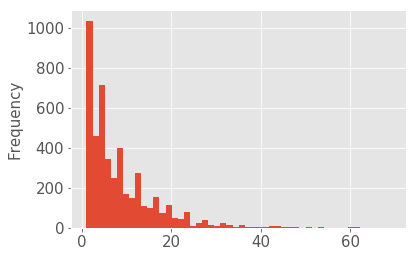

In [35]:
tsold_df['AdjudicacionNumeroOferentes'].plot.hist(bins=50);

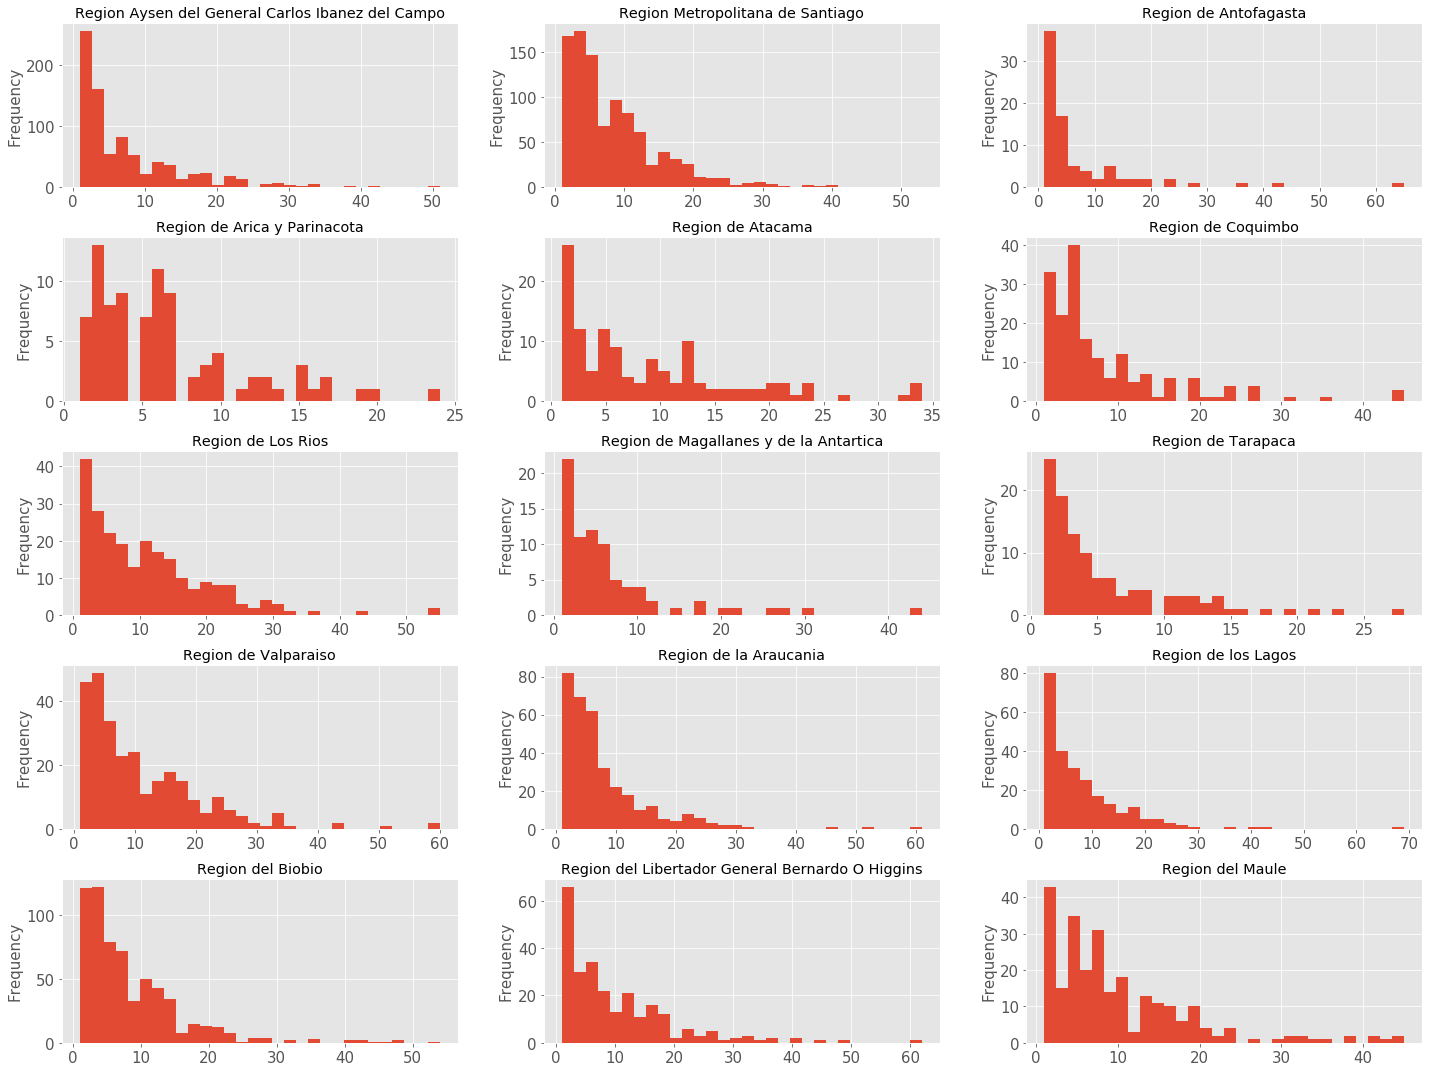

In [36]:
grouped_tsold = tsold_df[['CompradorRegionUnidad', 'AdjudicacionNumeroOferentes']] \
    .groupby('CompradorRegionUnidad')
    
fig, axes = plt.subplots(figsize=(20, 15), nrows=5, ncols=3);
cnt = 0
for name, group in grouped_tsold:
    i = cnt // 3
    j = cnt % 3
    title = name
    group.plot(kind='hist', ax=axes[i, j], bins=30, legend=None, title=title);
    cnt += 1
    
plt.tight_layout();

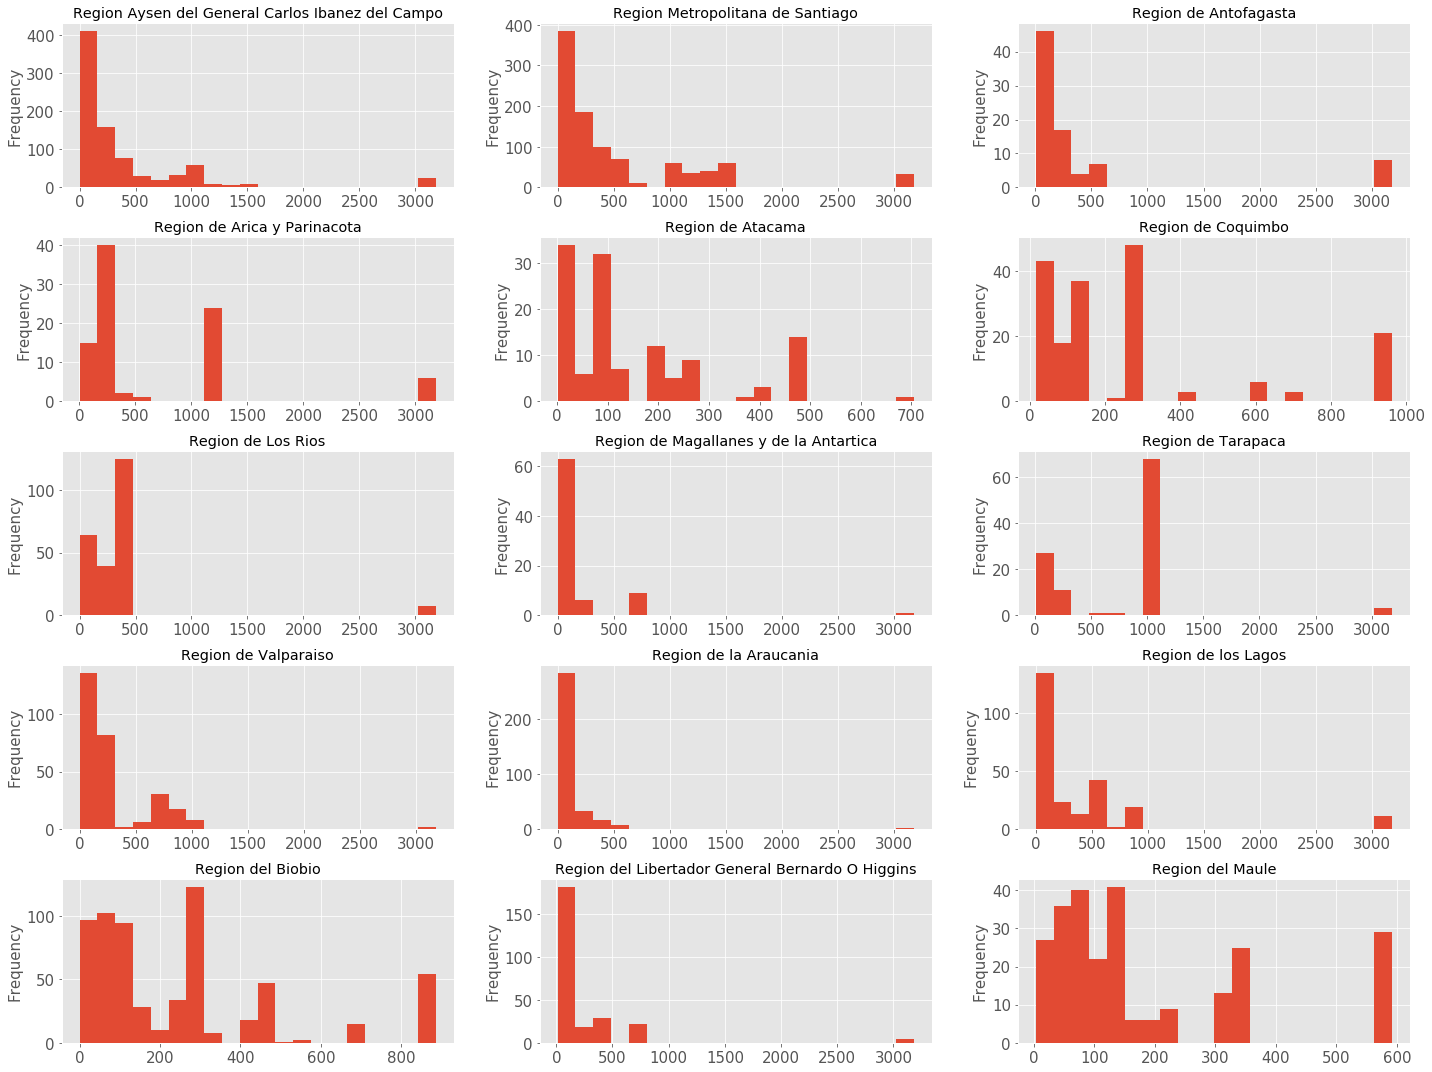

In [37]:
grouped_tsold = tsold_df[['CompradorRegionUnidad', 'CantidadReclamos']] \
    .groupby('CompradorRegionUnidad')
    
fig, axes = plt.subplots(figsize=(20, 15), nrows=5, ncols=3);
cnt = 0
for name, group in grouped_tsold:
    i = cnt // 3
    j = cnt % 3
    title = name
    group.plot(kind='hist', ax=axes[i, j], bins=20, legend=None, title=title);
    cnt += 1
    
plt.tight_layout();

In [38]:
grouped_tsold.describe()

CantidadReclamos              \
                                                            count        mean   
CompradorRegionUnidad                                                           
Region Aysen del General Carlos Ibanez del Campo            838.0  392.053699   
Region Metropolitana de Santiago                            981.0  530.507645   
Region de Antofagasta                                        82.0  464.658537   
Region de Arica y Parinacota                                 88.0  681.886364   
Region de Atacama                                           124.0  158.903226   
Region de Coquimbo                                          180.0  268.850000   
Region de Los Rios                                          235.0  362.242553   
Region de Magallanes y de la Antartica                       79.0  173.569620   
Region de Tarapaca                                          111.0  810.441441   
Region de Valparaiso                                        283.0  306.049470   
Region de la Araucania                                      341.0  126.005865   
Region de los Lagos                                         245.0  398.457143   
Region del Biobio                                           633.0  258.243286   
Region del Libertador General Bernardo O Higgins            255.0  223.737255   
Region del Maule                                            254.0  184.582677   

                                                                            \
                                                         std   min     25%   
CompradorRegionUnidad                                                        
Region Aysen del General Carlos Ibanez del Campo  600.150448   0.0   53.00   
Region Metropolitana de Santiago                  680.754641   0.0   94.00   
Region de Antofagasta                             915.337706   3.0   34.00   
Region de Arica y Parinacota                      804.775109   2.0  274.00   
Region de Atacama                                 154.724745   1.0   32.25   
Region de Coquimbo                                290.316885  15.0   76.00   
Region de Los Rios                                515.657340   0.0  120.00   
Region de Magallanes y de la Antartica            404.843518   1.0   20.00   
Region de Tarapaca                                622.320083   7.0  195.00   
Region de Valparaiso                              368.389207   0.0   82.00   
Region de la Araucania                            200.581595   0.0   56.00   
Region de los Lagos                               665.282735   0.0   42.00   
Region del Biobio                                 248.203203   0.0   70.00   
Region del Libertador General Bernardo O Higgins  436.335489  12.0   38.00   
Region del Maule                                  177.051786   3.0   62.00   

                                                                          
                                                     50%     75%     max  
CompradorRegionUnidad                                                     
Region Aysen del General Carlos Ibanez del Campo   173.5   424.0  3182.0  
Region Metropolitana de Santiago                   231.0   625.0  3182.0  
Region de Antofagasta                               93.0   308.0  3182.0  
Region de Arica y Parinacota                       274.0  1173.0  3182.0  
Region de Atacama                                   90.0   233.0   705.0  
Region de Coquimbo                                 130.5   286.0   963.0  
Region de Los Rios                                 398.0   398.0  3182.0  
Region de Magallanes y de la Antartica              34.0   132.0  3178.0  
Region de Tarapaca                                1108.0  1108.0  3182.0  
Region de Valparaiso                               194.0   307.0  3178.0  
Region de la Araucania                              96.0   124.0  3182.0  
Region de los Lagos                                150.0   529.0  3182.0  
Region del Biobio                                  173.0   3

In [71]:
tdesert_df = tender_df[(tender_df['Estado'].str.lower().str.startswith('desi'))]
tdesert_tids = tdesert_df['CodigoExterno']
tprod_df['NombreProducto'].unique().tolist()

['Barreras',
 'Transportes de personal',
 'Hierro Fe',
 'Plancha de acero',
 'Pilotes de acero',
 'Cable de acero',
 'Eslabones de cadena',
 'Pinturas aceitosas',
 'Senales de trafico',
 'Pinturas al esmalte',
 'Diluyentes para pinturas y barnices',
 'Brochas',
 'Protectores',
 'Panos de limpieza',
 'Overol y sobretodo para hombre',
 'Pinturas',
 'Cuchillas o conjuntos de cuchillas de maquinaria',
 'Neumaticos para camionetas o automoviles',
 'Restauracion de albanileria mamposteria o azulejos',
 'Residuos o desperdicios peligrosos',
 'Lubricantes de uso general',
 'Antena LAN UMTS GSM',
 'Pantalones protectores',
 'Abrigos y chaquetas para hombre',
 'Pinturas acrilicas',
 'Materiales de texturizacion',
 'Equipo de carga',
 'Equipo para manejo de carga',
 'Cable de redes',
 'Sistemas de control o vigilancia de potencia',
 'Medidores de voltaje o corriente',
 'Osciloscopios',
 'Equipo de comunicacion de datos de radiofrecuencia',
 'Equipo basico de radio',
 'Sopladores o secadores',
 'S

In [76]:
police_df = tsold_df[
    (tsold_df['CompradorNombreOrganismo'].str.lower().str.startswith('carabinero'))
]
police_tids = police_df['CodigoExterno']
tprod_df[
    (tprod_df['CodigoExterno'].isin(police_tids))
]['NombreProducto'].unique()

array(['Cortinas', 'Servicios de transporte nacional por buques',
       'Bicicletas', 'Maquinas de multiples funciones',
       'Cocinas domesticas', 'Espectrometros de absorcion atomica AA',
       'Kits de ensayo de banco de sangre o suministros',
       'Palitos con casquillo de fibra', 'Farmacos veterinarios',
       'Cateteres de linea arterial',
       'Tuberia intravenosa con equipo de administracion del cateter',
       'Heparina sodica', 'Diazepam', 'Clorhidrato de midazolam',
       'Clorhidrato de dobutamina',
       'Equipo medico de radiologia y fluoroscopia RF',
       'Estimuladores quirurgicos de hueso',
       'Formulas suplementarias de adulto para uso general',
       'Formulas suplementarias pediatricas', 'Guantes o manoplas',
       'Cinturones o suspensores', 'Aros con pasador', 'Pan fresco',
       'Galletas dulces o pastelitos',
       'Refrigerador y congelador combinado',
       'Maquinas procesadoras de alimentos', 'Estanteria no modular',
       'Mesas de t

In [82]:
tender_df[
    (tender_df['CodigoExterno']=='3179-156-L116')
]

,AdjudicacionFecha,AdjudicacionNumero,AdjudicacionNumeroOferentes,AdjudicacionTipo,AdjudicacionUrlActa,CantidadReclamos,CodigoEstado,CodigoExterno,CodigoTipo,CompradorCargoUsuario,...,Tipo,TipoConvocatoria,TipoPago,TomaRazon,UnidadTiempo,UnidadTiempoContratoLicitacion,UnidadTiempoDuracionContrato,UnidadTiempoEvaluacion,VisibilidadMonto,tender_product_duplicated
3083,2016-12-14T00:00:00,1285,10.0,2.0,http://www.mercadopublico.cl/Procurement/Modules/RFB/StepsProcessAward/PreviewAwardAct.aspx?qs=Ldp8tkLKrO0+pAjm3U5za6iB/oOAjlVYVc67zQvQhQA=,573,8,3179-156-L116,1,Oficina,...,L1,1,2,0,1,1,1,1.0,1,NaN


In [86]:
tender_df.columns

Index(['AdjudicacionFecha', 'AdjudicacionNumero',
       'AdjudicacionNumeroOferentes', 'AdjudicacionTipo',
       'AdjudicacionUrlActa', 'CantidadReclamos', 'CodigoEstado',
       'CodigoExterno', 'CodigoTipo', 'CompradorCargoUsuario',
       'CompradorCodigoOrganismo', 'CompradorCodigoUnidad',
       'CompradorCodigoUsuario', 'CompradorComunaUnidad',
       'CompradorDireccionUnidad', 'CompradorNombreOrganismo',
       'CompradorNombreUnidad', 'CompradorNombreUsuario',
       'CompradorRegionUnidad', 'CompradorRutUnidad', 'CompradorRutUsuario',
       'Contrato', 'Descripcion', 'EmailResponsableContrato',
       'EmailResponsablePago', 'Estado', 'EstadoEtapas',
       'EstadoPublicidadOfertas', 'Estimacion', 'Etapas', 'ExtensionPlazo',
       'FechasFechaActoAperturaEconomica', 'FechasFechaActoAperturaTecnica',
       'FechasFechaAdjudicacion', 'FechasFechaCierre', 'FechasFechaCreacion',
       'FechasFechaEstimadaAdjudicacion', 'FechasFechaFinal',
       'FechasFechaInicio', 'Fechas

In [84]:
tprod_df[
    (tprod_df['CodigoExterno']=='3179-156-L116')
]

,AdjudicacionCantidad,AdjudicacionMontoUnitario,AdjudicacionNombreProveedor,AdjudicacionRutProveedor,Cantidad,Categoria,CodigoCategoria,CodigoExterno,CodigoProducto,Correlativo,Descripcion,NombreProducto,UnidadMedida
35795,1.0,161405.0,ANRIQUEZ Y COMPANIA LIMITADA,76.360.790-9,1.0,Vehiculos y equipamiento en general / Bicicletas / Vehiculos a pedal,25161500,3179-156-L116,25161507,1,BICICLETA ESTATICA,Bicicletas,Unidad
35796,1.0,233320.0,ANRIQUEZ Y COMPANIA LIMITADA,76.360.790-9,1.0,Equipos accesorios y suministros de oficina / Maquinarias suministros y accesorios de oficina / Multicopistas fotocopiadoras fax y multifuncionales,44101500,3179-156-L116,44101503,2,MAQUINAS DE EJERCICION UNIVERSAL,Maquinas de multiples funciones,Unidad
35797,1.0,339000.0,COMERCIALIZADORA VICTOR GONZALEZ EIRL,76.210.028-2,1.0,Equipos accesorios y suministros de oficina / Maquinarias suministros y accesorios de oficina / Multicopistas fotocopiadoras fax y multifuncionales,44101500,3179-156-L116,44101503,3,TROTADORA PARA EJERCICIOS,Maquinas de multiples funciones,Unidad


In [78]:
tprod_df[
    (tprod_df['CodigoExterno'].isin(police_tids))&
    (tprod_df['NombreProducto'].str.lower().str.startswith('bici'))
]

,AdjudicacionCantidad,AdjudicacionMontoUnitario,AdjudicacionNombreProveedor,AdjudicacionRutProveedor,Cantidad,Categoria,CodigoCategoria,CodigoExterno,CodigoProducto,Correlativo,Descripcion,NombreProducto,UnidadMedida
35795,1.0,161405.0,ANRIQUEZ Y COMPANIA LIMITADA,76.360.790-9,1.0,Vehiculos y equipamiento en general / Bicicletas / Vehiculos a pedal,25161500,3179-156-L116,25161507,1,BICICLETA ESTATICA,Bicicletas,Unidad


In [39]:
tsold_df['CompradorNombreOrganismo'][(tsold_df['CompradorNombreOrganismo'].str.lower().str.startswith('hos'))].unique().shape

(118,)

In [40]:
tsold_df.CompradorNombreOrganismo.unique()

array(['MOP Direccion de Vialidad',
       'Ministerio de Obras Publicas Direccion Gral de OOPP',
       'Corporacion Nacional Forestal CONAF',
       'Direccion General de Aguas MOP',
       'Instituto de Desarrollo Agropecuario INDAP',
       'Direccion General de Aeronautica Civil',
       'Servicio de Salud Valparaiso San Antonio',
       'Servicio Agricola y Ganadero', 'Servicio de Salud Araucania Sur',
       'Instituto Nacional de Deportes de Chile',
       'Servicio de Salud Concepcion', 'Servicio Nacional de Aduanas',
       'Gobierno Regional Metropolitano',
       'Servicio de Salud Metropolitano Occidente',
       'Servicio Nacional del Adulto Mayor', 'Hospital Herminda Martin',
       'Gendarmeria de Chile', 'Hospital Doctor Hernan Henriquez Aravena',
       'Hospital Gorbea', 'Consultorio Miraflores',
       'Ilustre Municipalidad de Recoleta', 'Servicio de Salud Coquimbo',
       'Hospital Pedro Morales C', 'Servicio de Salud Ohiggins',
       'Gobernacion Provincial de 

In [41]:
tender_df[(tender_df['Estado'].str.lower().str.startswith('d'))]

,AdjudicacionFecha,AdjudicacionNumero,AdjudicacionNumeroOferentes,AdjudicacionTipo,AdjudicacionUrlActa,CantidadReclamos,CodigoEstado,CodigoExterno,CodigoTipo,CompradorCargoUsuario,...,Tipo,TipoConvocatoria,TipoPago,TomaRazon,UnidadTiempo,UnidadTiempoContratoLicitacion,UnidadTiempoDuracionContrato,UnidadTiempoEvaluacion,VisibilidadMonto,tender_product_duplicated
8,NaN,NaN,2.0,NaN,http://www.mercadopublico.cl/Procurement/Modules/RFB/StepsProcessAward/PreviewAwardAct.aspx?qs=il1mk9F454/a9401QjVO5d2xJsVzhL40yhR3K9FFIIU=,122,7,1003-65-LE16,1,Unidad de Gestion y Ejecucion Presupuestaria,...,LE,1,4,0,1,2,2,1.0,1,NaN
10,NaN,NaN,1.0,NaN,http://www.mercadopublico.cl/Procurement/Modules/RFB/StepsProcessAward/PreviewAwardAct.aspx?qs=wqGFS8P09TmCJYgMdlNioLkDIQZll+dyq1kHqDBxWrs=,122,7,1003-68-LE16,1,Unidad de Gestion y Ejecucion Presupuestaria,...,LE,1,4,0,1,2,2,1.0,1,NaN
15,NaN,NaN,2.0,NaN,http://www.mercadopublico.cl/Procurement/Modules/RFB/StepsProcessAward/PreviewAwardAct.aspx?qs=bkI28ufuEnIzjZmefZsT7fc7zY8HqfAByfRdsHsNGkA=,122,7,1006-34-LE16,1,NaN,...,LE,1,4,0,1,1,2,1.0,0,NaN
20,NaN,NaN,1.0,NaN,http://www.mercadopublico.cl/Procurement/Modules/RFB/StepsProcessAward/PreviewAwardAct.aspx?qs=gkIRlv3q1ErHGfbiXCDV9NYGDU8WeK1RwfDQPCkNzQo=,122,7,1028-154-L116,1,Jefe Regional Adquisiciones,...,L1,1,4,0,1,1,1,1.0,1,NaN
27,NaN,NaN,1.0,NaN,http://www.mercadopublico.cl/Procurement/Modules/RFB/StepsProcessAward/PreviewAwardAct.aspx?qs=pU2/JBa9wNPkiSlkpY7QjEesg96raQFhCrkYjyjPMzs=,122,7,1029-105-L116,1,Encargada Abastecimiento,...,L1,1,4,0,1,0,1,1.0,0,NaN
76,NaN,NaN,2.0,NaN,http://www.mercadopublico.cl/Procurement/Modules/RFB/StepsProcessAward/PreviewAwardAct.aspx?qs=lRYpnaSMWvfU2sfyQGerL3FfnNPYBMPi1oFTy/GKIoQ=,62,7,1175-343-LQ16,1,Administrador,...,LQ,1,4,0,1,2,4,1.0,1,NaN
78,NaN,NaN,0.0,NaN,http://www.mercadopublico.cl/Procurement/Modules/RFB/StepsProcessAward/PreviewAwardAct.aspx?qs=N2v5fMU/hqpFE8Jm4El9IKscP+MebeL3X7OdUbB5PUM=,62,7,1175-348-LE16,1,Administrador,...,LE,1,4,0,1,2,4,1.0,1,NaN
86,NaN,NaN,2.0,NaN,http://www.mercadopublico.cl/Procurement/Modules/RFB/StepsProcessAward/PreviewAwardAct.aspx?qs=l9L2J4nNsALBqMocr7M7sG1VHAjHOgPsoRlfp3vZEBQ=,62,7,1175-369-LE16,1,Administrador,...,LE,1,4,0,1,2,4,1.0,1,NaN
90,NaN,NaN,2.0,NaN,http://www.mercadopublico.cl/Procurement/Modules/RFB/StepsProcessAward/PreviewAwardAct.aspx?qs=5bhpVZYDer9SghmA2+H4/hWZjEDDwvNl/urcFGLNhBw=,62,7,1175-373-LQ16,1,Administrador,...,LQ,1,4,0,1,2,4,1.0,1,NaN
93,NaN,NaN,1.0,NaN,http://www.mercadopublico.cl/Procurement/Modules/RFB/StepsProcessAward/PreviewAwardAct.aspx?qs=LFYHmR4plpDNUNn924MjIN7FdR3cvfbPd0qOKbkWk3A=,62,7,1175-376-LP16,1,Administrador,...,LP,1,4,0,1,2,4,1.0,1,NaN


In [56]:
tender_df[(tender_df['CodigoExterno']=='1003-65-LE16')].CompradorRegionUnidad

8    Region Aysen del General Carlos Ibanez del Campo
Name: CompradorRegionUnidad, dtype: object

In [43]:
tprod_df[(tprod_df['CodigoExterno']=='1003-65-LE16')]

,AdjudicacionCantidad,AdjudicacionMontoUnitario,AdjudicacionNombreProveedor,AdjudicacionRutProveedor,Cantidad,Categoria,CodigoCategoria,CodigoExterno,CodigoProducto,Correlativo,Descripcion,NombreProducto,UnidadMedida
33,NaN,NaN,NaN,NaN,1.0,Servicios de construccion y mantenimiento / Servicios de atencion mantenimiento y reparaciones de edificios / Albanileria mamposteria y colocacion de azulejos,72102500,1003-65-LE16,72102508,1,Reposicion cubierta Laboratorio Regional de Vialidad mano de obra,Restauracion de albanileria mamposteria o azulejos,Unidad
34,NaN,NaN,NaN,NaN,1.0,Servicios de construccion y mantenimiento / Servicios de atencion mantenimiento y reparaciones de edificios / Albanileria mamposteria y colocacion de azulejos,72102500,1003-65-LE16,72102508,2,Reposicion cubierta Laboratorio Regional de Vialidad materiales,Restauracion de albanileria mamposteria o azulejos,Unidad


In [58]:
tsold_df[(tsold_df['CodigoExterno']=='1003-64-LE16')]

,AdjudicacionFecha,AdjudicacionNumero,AdjudicacionNumeroOferentes,AdjudicacionTipo,AdjudicacionUrlActa,CantidadReclamos,CodigoEstado,CodigoExterno,CodigoTipo,CompradorCargoUsuario,...,Tipo,TipoConvocatoria,TipoPago,TomaRazon,UnidadTiempo,UnidadTiempoContratoLicitacion,UnidadTiempoDuracionContrato,UnidadTiempoEvaluacion,VisibilidadMonto,tender_product_duplicated
7,2016-11-24T00:00:00,1748,2.0,2.0,http://www.mercadopublico.cl/Procurement/Modules/RFB/StepsProcessAward/PreviewAwardAct.aspx?qs=0F4Onvv+9zYhIMV65YT9DpiALOQTK21Hbf5hhQHf1c4=,122,8,1003-64-LE16,1,Unidad de Gestion y Ejecucion Presupuestaria,...,LE,1,4,0,1,2,2,1.0,0,NaN


In [59]:
tprod_df[(tprod_df['CodigoExterno']=='1003-64-LE16')]

,AdjudicacionCantidad,AdjudicacionMontoUnitario,AdjudicacionNombreProveedor,AdjudicacionRutProveedor,Cantidad,Categoria,CodigoCategoria,CodigoExterno,CodigoProducto,Correlativo,Descripcion,NombreProducto,UnidadMedida
31,1.0,2110000.0,constructora felix valenca,76.533.119-6,1.0,Servicios de construccion y mantenimiento / Servicios de atencion mantenimiento y reparaciones de edificios / Albanileria mamposteria y colocacion de azulejos,72102500,1003-64-LE16,72102508,1,Habilitacion de bodega Recinto Fiscal Villa Manihuales mano de obra,Restauracion de albanileria mamposteria o azulejos,Unidad
32,1.0,9699500.0,constructora felix valenca,76.533.119-6,1.0,Servicios de construccion y mantenimiento / Servicios de atencion mantenimiento y reparaciones de edificios / Albanileria mamposteria y colocacion de azulejos,72102500,1003-64-LE16,72102508,2,Habilitacion de bodega Recinto Fiscal Villa Manihuales materiales,Restauracion de albanileria mamposteria o azulejos,Unidad


In [44]:
tprod_df[(tprod_df['CodigoProducto']==72102508)]

,AdjudicacionCantidad,AdjudicacionMontoUnitario,AdjudicacionNombreProveedor,AdjudicacionRutProveedor,Cantidad,Categoria,CodigoCategoria,CodigoExterno,CodigoProducto,Correlativo,Descripcion,NombreProducto,UnidadMedida
31,1.0,2110000.0,constructora felix valenca,76.533.119-6,1.0,Servicios de construccion y mantenimiento / Servicios de atencion mantenimiento y reparaciones de edificios / Albanileria mamposteria y colocacion de azulejos,72102500,1003-64-LE16,72102508,1,Habilitacion de bodega Recinto Fiscal Villa Manihuales mano de obra,Restauracion de albanileria mamposteria o azulejos,Unidad
32,1.0,9699500.0,constructora felix valenca,76.533.119-6,1.0,Servicios de construccion y mantenimiento / Servicios de atencion mantenimiento y reparaciones de edificios / Albanileria mamposteria y colocacion de azulejos,72102500,1003-64-LE16,72102508,2,Habilitacion de bodega Recinto Fiscal Villa Manihuales materiales,Restauracion de albanileria mamposteria o azulejos,Unidad
33,NaN,NaN,NaN,NaN,1.0,Servicios de construccion y mantenimiento / Servicios de atencion mantenimiento y reparaciones de edificios / Albanileria mamposteria y colocacion de azulejos,72102500,1003-65-LE16,72102508,1,Reposicion cubierta Laboratorio Regional de Vialidad mano de obra,Restauracion de albanileria mamposteria o azulejos,Unidad
34,NaN,NaN,NaN,NaN,1.0,Servicios de construccion y mantenimiento / Servicios de atencion mantenimiento y reparaciones de edificios / Albanileria mamposteria y colocacion de azulejos,72102500,1003-65-LE16,72102508,2,Reposicion cubierta Laboratorio Regional de Vialidad materiales,Restauracion de albanileria mamposteria o azulejos,Unidad
62,NaN,NaN,NaN,NaN,1.0,Servicios de construccion y mantenimiento / Servicios de atencion mantenimiento y reparaciones de edificios / Albanileria mamposteria y colocacion de azulejos,72102500,1003-68-LE16,72102508,1,Reposicion cubierta Laboratorio Regional de Vialidad mano de obra,Restauracion de albanileria mamposteria o azulejos,Unidad
63,NaN,NaN,NaN,NaN,1.0,Servicios de construccion y mantenimiento / Servicios de atencion mantenimiento y reparaciones de edificios / Albanileria mamposteria y colocacion de azulejos,72102500,1003-68-LE16,72102508,2,Reposicion cubierta Laboratorio Regional de Vialidad materiales,Restauracion de albanileria mamposteria o azulejos,Unidad
20543,1.0,1790500.0,sociedad de mantenimiento construccion y servicio,76.245.528-5,1.0,Servicios de construccion y mantenimiento / Servicios de atencion mantenimiento y reparaciones de edificios / Albanileria mamposteria y colocacion de azulejos,72102500,2271-142-L116,72102508,1,A MEJORAMIENTO DE INSTALACION Y REUBICACION DE BOMBA E HIDRONEUMATICO de acuerdo a Especificaciones Tecnicas adjuntas,Restauracion de albanileria mamposteria o azulejos,Global
20544,1.0,675500.0,sociedad de mantenimiento construccion y servicio,76.245.528-5,1.0,Servicios de construccion y mantenimiento / Servicios de atencion mantenimiento y reparaciones de edificios / Albanileria mamposteria y colocacion de azulejos,72102500,2271-142-L116,72102508,2,B NORMALIZACION DE LA RED HIDRAULICA Y GRIFOS de acuerdo a Especificaciones Tecnicas adjuntas,Restauracion de albanileria mamposteria o azulejos,Global
20545,1.0,137000.0,OBCIEL FERNANDEZ VERDUGO,7.502.250-6,1.0,Servicios de construccion y mantenimiento / Servicios de atencion mantenimiento y reparaciones de edificios / Albanileria mamposteria y colocacion de azulejos,72102500,2271-144-L116,72102508,1,1 RETIRO DE TABIQUE EXISTENTE de acuerdo a Especificaciones Tecnicas adjuntas,Restauracion de albanileria mamposteria o azulejos,Global
20546,1.0,660000.0,OBCIEL FERNANDEZ VERDUGO,7.502.250-6,1.0,Servicios de construccion y mantenimiento / Servicios de atencion mantenimiento y reparaciones de edificios / Albanileria mamposteria y colocacion de azulejos,72102500,2271-144-L116,72102508,2,2 CONFECCION Y PROVISION DE TABIQUE DIVISORIO de acuerdo a Especificaciones Tecnicas adjuntas,Restauracion de albanileria mamposteria o azulejos,G